# PCA Analysis to determine top features for lopbdy_features.csv

This notebook performs exploratory data analysis on `lopbdy_features.csv` which contains pure price features (no macro factors).

## Data Source
- File: `lopbdy_features.csv`
- Features: Pure price-based features only
- No future features or macro factors


In [71]:
import pandas as pd
import numpy as np
np.bool = bool  # temporary compatibility shim
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# Load lopbdy_features.csv
data_dir = Path("../data_processed")
train_df = pd.read_csv(data_dir / "lopbdy_features.csv", index_col=0, parse_dates=True)

print(f"Data shape: {train_df.shape}")
print(f"Date range: {train_df.index.min()} to {train_df.index.max()}")
print(f"\nColumns: {list(train_df.columns)}")
print(f"\nFirst few rows:")
train_df.head()


Data shape: (6304, 17)
Date range: 2000-12-19 00:00:00 to 2025-12-04 00:00:00

Columns: ['LOPBDY LME Comdty', 'returns', 'MA7', 'MA30', 'rolling_volatility', 'EMA5', 'EMA15', 'EMA30', 'MACD5', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower', 'return_7d', 'target']

First few rows:


,LOPBDY LME Comdty,returns,MA7,MA30,rolling_volatility,EMA5,EMA15,EMA30,MACD5,MACD15,MACD30,RSI,BB_upper,BB_middle,BB_lower,return_7d,target
Security,,,,,,,,,,,,,,,,,
2025-12-04,1962.0,NaN,1962.000000,1962.000000,NaN,1962.000000,1962.000000,1962.000000,0.000000,0.000000,0.000000,NaN,NaN,1962.000000,NaN,-0.000255,0
2025-12-03,1961.0,-0.000510,1961.500000,1961.500000,NaN,1961.666667,1961.875000,1961.935484,-0.259259,-0.050926,0.009558,0.000000,1962.914214,1961.500000,1960.085786,-0.000510,0
2025-12-02,1965.0,0.002040,1962.666667,1962.666667,0.001803,1962.777778,1962.265625,1962.133195,0.624143,0.111990,-0.020441,80.000000,1966.829999,1962.666667,1958.503335,0.006107,1
2025-12-01,1946.0,-0.009669,1958.500000,1958.500000,0.006158,1957.185185,1960.232422,1961.092343,-3.771884,-0.724648,0.135274,16.666667,1975.509801,1958.500000,1941.490199,0.024152,1
2025-11-28,1955.0,0.004625,1957.800000,1957.800000,0.006224,1956.456790,1959.578369,1960.699289,-4.059015,-0.937436,0.183484,39.393939,1972.859880,1957.800000,1942.740120,0.019949,1


In [73]:
# Extract features (X) - exclude target variables
irr_cols = ['LOPBDY LME Comdty', 'return_7d', 'target', 'Security']
X = train_df.drop(columns=irr_cols, errors='ignore')

print(f"Feature matrix X shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFeature columns:")
print(list(X.columns))
print(f"\nFirst few rows of X:")
X.head()


Feature matrix X shape: (6304, 14)
Number of features: 14

Feature columns:
['returns', 'MA7', 'MA30', 'rolling_volatility', 'EMA5', 'EMA15', 'EMA30', 'MACD5', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower']

First few rows of X:


,returns,MA7,MA30,rolling_volatility,EMA5,EMA15,EMA30,MACD5,MACD15,MACD30,RSI,BB_upper,BB_middle,BB_lower
Security,,,,,,,,,,,,,,
2025-12-04,NaN,1962.000000,1962.000000,NaN,1962.000000,1962.000000,1962.000000,0.000000,0.000000,0.000000,NaN,NaN,1962.000000,NaN
2025-12-03,-0.000510,1961.500000,1961.500000,NaN,1961.666667,1961.875000,1961.935484,-0.259259,-0.050926,0.009558,0.000000,1962.914214,1961.500000,1960.085786
2025-12-02,0.002040,1962.666667,1962.666667,0.001803,1962.777778,1962.265625,1962.133195,0.624143,0.111990,-0.020441,80.000000,1966.829999,1962.666667,1958.503335
2025-12-01,-0.009669,1958.500000,1958.500000,0.006158,1957.185185,1960.232422,1961.092343,-3.771884,-0.724648,0.135274,16.666667,1975.509801,1958.500000,1941.490199
2025-11-28,0.004625,1957.800000,1957.800000,0.006224,1956.456790,1959.578369,1960.699289,-4.059015,-0.937436,0.183484,39.393939,1972.859880,1957.800000,1942.740120


Checking for missing values:
Total missing values: 6
Missing values per feature:
returns               1
MA7                   0
MA30                  0
rolling_volatility    2
EMA5                  0
EMA15                 0
EMA30                 0
MACD5                 0
MACD15                0
MACD30                0
RSI                   1
BB_upper              1
BB_middle             0
BB_lower              1
dtype: int64

Rows with any missing values: 2

After dropping rows with NaN: 6302 rows (dropped 2 rows)
Explained Variance Ratio for first 10 components:
PC1: 0.5745 (57.45%)
PC2: 0.2310 (23.10%)
PC3: 0.0761 (7.61%)
PC4: 0.0717 (7.17%)
PC5: 0.0381 (3.81%)
PC6: 0.0071 (0.71%)
PC7: 0.0008 (0.08%)
PC8: 0.0006 (0.06%)
PC9: 0.0000 (0.00%)
PC10: 0.0000 (0.00%)

Cumulative variance for first 10 components: 1.0000 (100.00%)

Top 10 Features based on PCA:
           Feature  Importance
            MACD30    2.491608
            MACD15    2.131477
             MACD5    1.939906
        

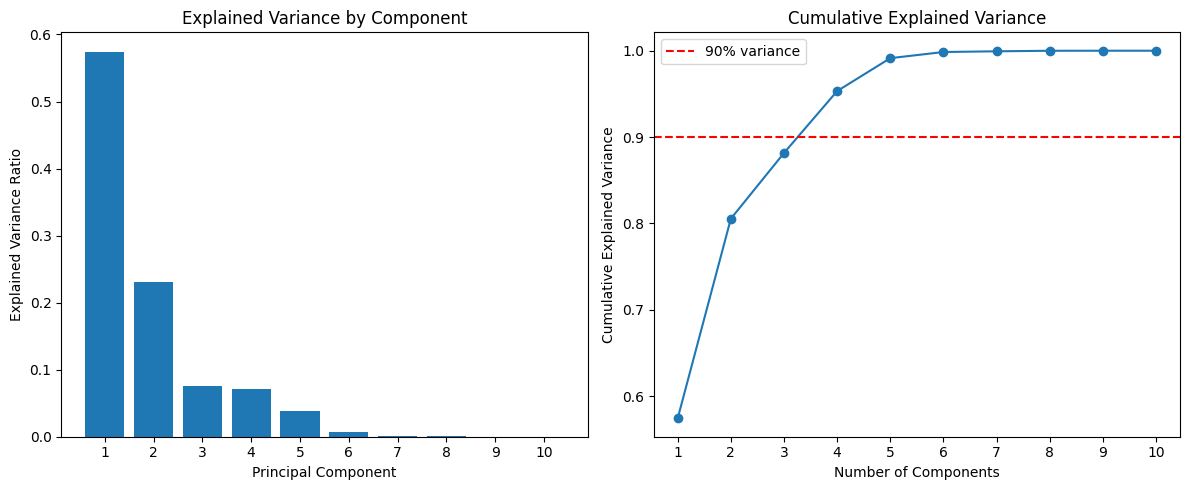

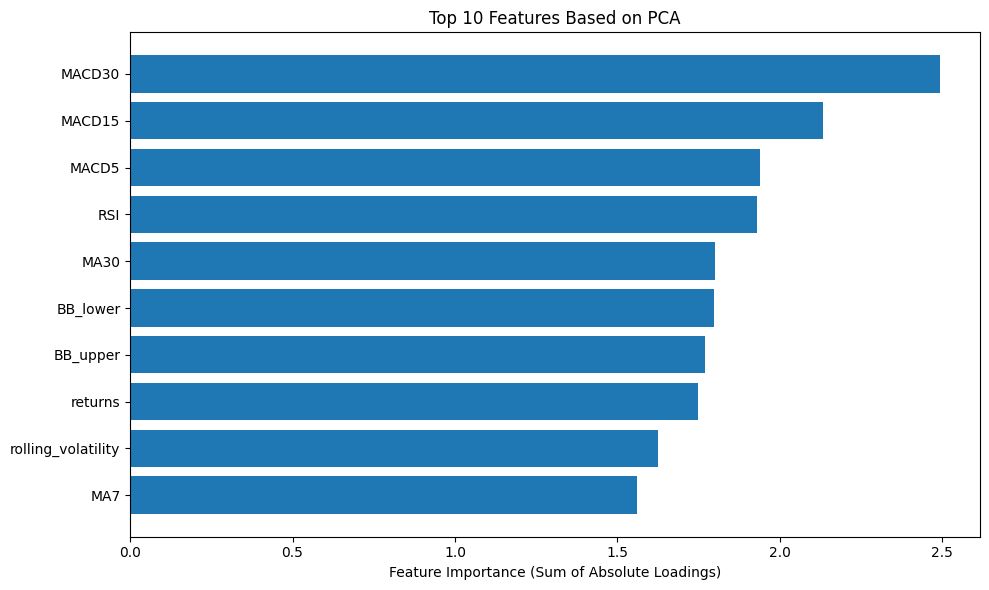


Top 10 Feature Names:
['MACD30', 'MACD15', 'MACD5', 'RSI', 'MA30', 'BB_lower', 'BB_upper', 'returns', 'rolling_volatility', 'MA7']


In [74]:
# PCA Analysis to determine top features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Check for missing values
print("Checking for missing values:")
print(f"Total missing values: {X.isna().sum().sum()}")
print(f"Missing values per feature:")
print(X.isna().sum())
print(f"\nRows with any missing values: {X.isna().any(axis=1).sum()}")

# Handle missing values: drop rows with any NaN (common for time series)
# Alternative: could use forward fill (ffill) or backward fill (bfill)
X_clean = X.dropna()
print(f"\nAfter dropping rows with NaN: {X_clean.shape[0]} rows (dropped {X.shape[0] - X_clean.shape[0]} rows)")

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance for first 10 components
print("Explained Variance Ratio for first 10 components:")
for i in range(min(10, len(explained_variance))):
    print(f"PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")

print(f"\nCumulative variance for first 10 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")

# Get component loadings (correlations between features and principal components)
component_loadings = pca.components_.T  # Transpose to get features x components

# Calculate feature importance based on absolute loadings across top components
# We'll use the first 10 components to determine top features
n_components_to_use = min(10, len(pca.components_))
feature_importance = np.abs(component_loadings[:, :n_components_to_use]).sum(axis=1)

# Create DataFrame with feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 Features based on PCA:")
print(feature_importance_df.head(10).to_string(index=False))

# Visualize explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Explained variance per component
plt.subplot(1, 2, 1)
plt.bar(range(1, min(11, len(explained_variance)+1)), explained_variance[:10])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.xticks(range(1, min(11, len(explained_variance)+1)))

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, min(11, len(cumulative_variance)+1)), cumulative_variance[:10], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.xticks(range(1, min(11, len(cumulative_variance)+1)))

plt.tight_layout()
plt.show()

# Visualize top 10 features
plt.figure(figsize=(10, 6))
top_10_features = feature_importance_df.head(10)
plt.barh(range(len(top_10_features)), top_10_features['Importance'].values)
plt.yticks(range(len(top_10_features)), top_10_features['Feature'].values)
plt.xlabel('Feature Importance (Sum of Absolute Loadings)')
plt.title('Top 10 Features Based on PCA')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Store top 10 feature names
top_10_feature_names = top_10_features['Feature'].tolist()
print(f"\nTop 10 Feature Names:")
print(top_10_feature_names)


In [75]:
# Features data description
stat = X.describe(percentiles=[.01,.05,.5,.95,.99]).T
stat['missing'] = X.isna().sum()
stat['skew'] = X.skew(numeric_only=True)
stat['kurt'] = X.kurt(numeric_only=True)

# IQR outliers (outside [Q1-3*IQR, Q3+3*IQR])
q1, q3 = X.quantile(.25), X.quantile(.75)
iqr = q3 - q1
out_mask = (X.lt(q1 - 3*iqr)) | (X.gt(q3 + 3*iqr))
stat['outliers_iqr3'] = out_mask.sum()

# Robust MAD z-score (good for heavy tails)
med = X.median()
mad = (X - med).abs().median() * 1.4826
mad_z = (X - med).div(mad.replace(0, np.nan)).abs()
stat['outliers_mad5'] = (mad_z > 5).sum()

stat.sort_values('outliers_mad5', ascending=False)


,count,mean,std,min,1%,5%,50%,95%,99%,max,missing,skew,kurt,outliers_iqr3,outliers_mad5
MACD30,6304.0,0.468700,9.340964,-50.254320,-33.474858,-14.690521,0.705477,14.010204,22.414513,42.041809,0,-0.759436,5.459368,136,122
MACD5,6304.0,-2.474486,67.732431,-312.382724,-176.704091,-97.730070,-5.287037,103.537376,221.836376,424.828353,0,0.714946,5.326832,148,121
MACD15,6304.0,-1.292821,30.454340,-141.798195,-78.768123,-43.625279,-2.390946,46.980481,106.127215,188.129595,0,0.788312,5.644216,149,121
rolling_volatility,6302.0,0.017630,0.007899,0.001803,0.007291,0.009183,0.015073,0.033764,0.042607,0.058406,2,1.570220,2.869803,51,103
returns,6303.0,-0.000047,0.019297,-0.165398,-0.049504,-0.030156,0.000000,0.030432,0.058269,0.124066,1,0.270035,3.756912,38,30
MA7,6304.0,1775.791405,664.939318,407.785714,431.008571,465.939286,1980.785714,2571.689286,3212.841429,3886.785714,0,-0.606525,-0.078535,0,0
MA30,6304.0,1778.522483,658.811898,414.750000,429.165500,465.088333,1991.266667,2576.093333,3140.769333,3707.583333,0,-0.649646,-0.089854,0,0
EMA5,6304.0,1775.554511,665.087472,407.828363,430.877278,465.906239,1981.764859,2571.341645,3227.524198,3907.243939,0,-0.606672,-0.081095,0,0
EMA15,6304.0,1776.736177,661.590297,411.527979,431.170062,465.918990,1985.950515,2578.758917,3192.004671,3782.515206,0,-0.633594,-0.094212,0,0
EMA30,6304.0,1778.497698,656.547849,416.824495,430.658168,465.899560,1989.414973,2572.245375,3184.024341,3638.574981,0,-0.673079,-0.113503,0,0


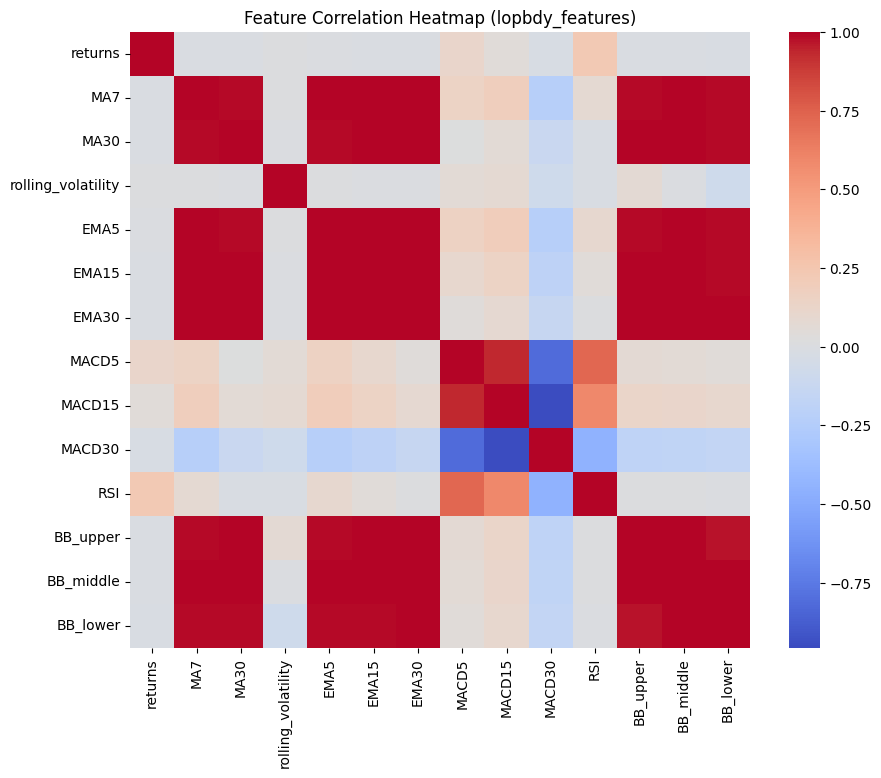

In [76]:
# plot the heatmap for feature correlation
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")

plt.title("Feature Correlation Heatmap (lopbdy_features)")

plt.show()


HIGH CORRELATION PAIRS IN TOP 10 PCA FEATURES

Found 8 high correlation pairs (|correlation| > 0.85):

Feature1 Feature2  Correlation
BB_upper     MA30     0.992661
BB_lower     MA30     0.992315
BB_upper      MA7     0.991658
    MA30      MA7     0.991239
BB_lower      MA7     0.987956
BB_lower BB_upper     0.976597
  MACD15   MACD30    -0.957509
  MACD15    MACD5     0.935032

Summary:
  Total high correlation pairs in top 10: 8
  Positive correlations: 7
  Negative correlations: 1
  Max correlation: 0.9927
  Min correlation: 0.9350


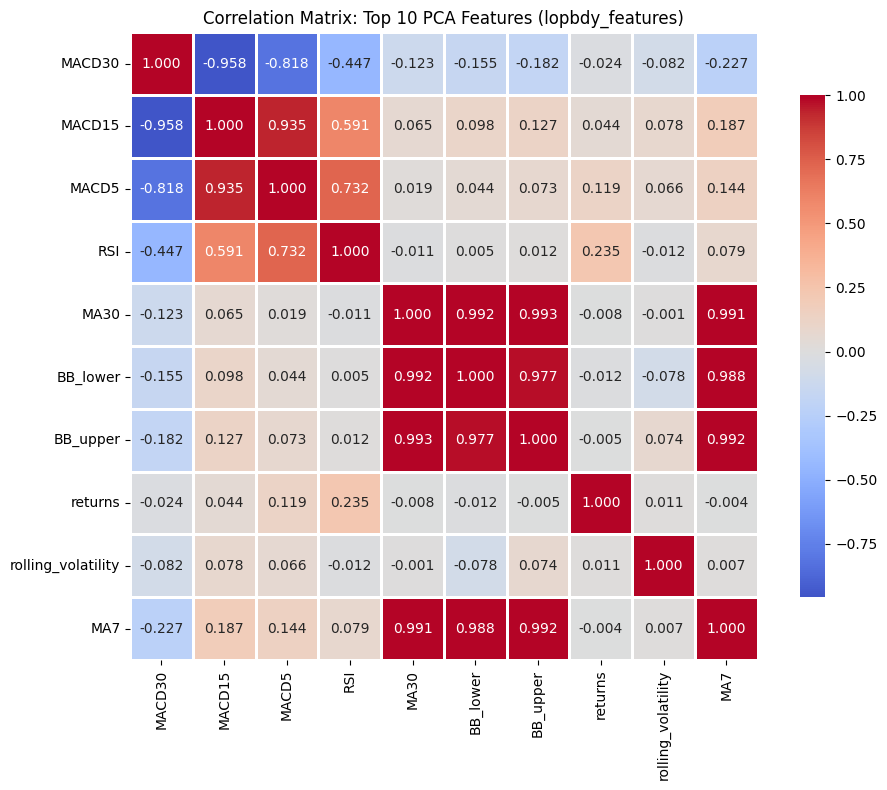

In [77]:
# Check high correlation among top 10 features from first PCA (Cell 4)
# Filter high correlation pairs to only include pairs where both features are in top 10

# Top 10 features from first PCA (Cell 4)
# Check if top_10_feature_names is defined (from Cell 4)
if 'top_10_feature_names' not in locals():
    raise ValueError("Please run Cell 4 first to calculate top_10_feature_names")

top_10_pca_features = top_10_feature_names

# Get correlation matrix for all features
corr_matrix = X.corr()

# Find high correlation pairs among top 10 PCA features
top_10_high_corr_pairs = []
for i in top_10_pca_features:
    for j in top_10_pca_features:
        if i < j:  # Only check upper triangle to avoid duplicates
            if i in corr_matrix.columns and j in corr_matrix.columns:
                corr_val = corr_matrix.loc[i, j]
                if abs(corr_val) > 0.85:  # High correlation threshold
                    top_10_high_corr_pairs.append({
                        'Feature1': i,
                        'Feature2': j,
                        'Correlation': corr_val
                    })

# Convert to DataFrame for better display
if top_10_high_corr_pairs:
    top_10_high_corr_df = pd.DataFrame(top_10_high_corr_pairs)
    top_10_high_corr_df = top_10_high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    
    print("="*60)
    print("HIGH CORRELATION PAIRS IN TOP 10 PCA FEATURES")
    print("="*60)
    print(f"\nFound {len(top_10_high_corr_pairs)} high correlation pairs (|correlation| > 0.85):\n")
    print(top_10_high_corr_df.to_string(index=False))
    
    print(f"\nSummary:")
    print(f"  Total high correlation pairs in top 10: {len(top_10_high_corr_pairs)}")
    print(f"  Positive correlations: {(top_10_high_corr_df['Correlation'] > 0).sum()}")
    print(f"  Negative correlations: {(top_10_high_corr_df['Correlation'] < 0).sum()}")
    if len(top_10_high_corr_df) > 0:
        print(f"  Max correlation: {top_10_high_corr_df['Correlation'].abs().max():.4f}")
        print(f"  Min correlation: {top_10_high_corr_df['Correlation'].abs().min():.4f}")
    
    # Visualize correlation matrix for top 10 features
    plt.figure(figsize=(10, 8))
    top_10_corr = corr_matrix.loc[top_10_pca_features, top_10_pca_features]
    sns.heatmap(top_10_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 10 PCA Features (lopbdy_features)')
    plt.tight_layout()
    plt.show()
else:
    print("="*60)
    print("HIGH CORRELATION PAIRS IN TOP 10 PCA FEATURES")
    print("="*60)
    print("\nNo high correlation pairs found (|correlation| > 0.85) among top 10 PCA features.")
    
    # Still show correlation matrix for visualization
    plt.figure(figsize=(10, 8))
    top_10_corr = corr_matrix.loc[top_10_pca_features, top_10_pca_features]
    sns.heatmap(top_10_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 10 PCA Features (lopbdy_features)')
    plt.tight_layout()
    plt.show()


In [78]:
# This cell has been removed - VIF analysis now focuses on 5 baseline features only


In [79]:
# Find all high correlation pairs (|correlation| > 0.85)
# Get correlation matrix (use corr from Cell 6, or calculate if not available)
if 'corr' not in locals():
    corr = X.corr()

high_corr_pairs = []
for i in corr.columns:
    for j in corr.columns:
        if i < j:  # Only check upper triangle to avoid duplicates
            corr_val = corr.loc[i, j]
            if abs(corr_val) > 0.85:
                high_corr_pairs.append({
                    'Feature1': i,
                    'Feature2': j,
                    'Correlation': corr_val
                })

# Convert to DataFrame for better display
if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    
    print(f"Found {len(high_corr_pairs)} high correlation pairs (|correlation| > 0.85):\n")
    print(high_corr_df.to_string(index=False))
    
    # Also print summary statistics
    print(f"\nSummary:")
    print(f"  Total pairs: {len(high_corr_pairs)}")
    print(f"  Positive correlations: {(high_corr_df['Correlation'] > 0).sum()}")
    print(f"  Negative correlations: {(high_corr_df['Correlation'] < 0).sum()}")
    print(f"  Max correlation: {high_corr_df['Correlation'].abs().max():.4f}")
    print(f"  Min correlation: {high_corr_df['Correlation'].abs().min():.4f}")
else:
    print("No high correlation pairs found (|correlation| > 0.85)")
    high_corr_df = pd.DataFrame()  # Create empty DataFrame to avoid errors


Found 30 high correlation pairs (|correlation| > 0.85):

 Feature1  Feature2  Correlation
     EMA5       MA7     0.999587
    EMA30      MA30     0.999255
BB_middle     EMA15     0.998993
BB_middle     EMA30     0.998945
    EMA15       MA7     0.998762
BB_middle      MA30     0.998332
    EMA15     EMA30     0.998234
    EMA15      EMA5     0.998130
    EMA15      MA30     0.996346
BB_middle       MA7     0.995747
BB_middle  BB_upper     0.994887
BB_middle      EMA5     0.994625
    EMA30       MA7     0.994524
 BB_upper     EMA15     0.994323
    EMA30      EMA5     0.993545
 BB_upper     EMA30     0.993488
 BB_lower BB_middle     0.993325
 BB_lower     EMA30     0.992675
 BB_upper      MA30     0.992661
 BB_lower      MA30     0.992315
 BB_lower     EMA15     0.991825
 BB_upper       MA7     0.991658
     MA30       MA7     0.991239
 BB_upper      EMA5     0.990736
     EMA5      MA30     0.990065
 BB_lower       MA7     0.987956
 BB_lower      EMA5     0.986618
 BB_lower  BB_upper

In [80]:
# Drop highly correlated features based on analysis from Cell 7 and Cell 8
# Removing redundant features:
# - EMA5, EMA15, EMA30 (highly correlated with MA series, keep MA instead)
# - BB_middle (highly correlated with BB_upper and BB_lower)
# - MACD5 (highly correlated with MACD15, keep MACD15 and MACD30)

features_to_drop = ['EMA5', 'EMA15', 'EMA30', 'BB_middle', 'MACD5']
print(f"Dropping {len(features_to_drop)} highly correlated features: {features_to_drop}")
print(f"Features before dropping: {X.shape[1]}")
X = X.drop(features_to_drop, axis=1)
print(f"Features after dropping: {X.shape[1]}")
print(f"\nRemaining features: {list(X.columns)}")


Dropping 5 highly correlated features: ['EMA5', 'EMA15', 'EMA30', 'BB_middle', 'MACD5']
Features before dropping: 14
Features after dropping: 9

Remaining features: ['returns', 'MA7', 'MA30', 'rolling_volatility', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_lower']


Analyzing VIF for 5 alternative features:
  ['MACD15', 'MA7', 'RSI', 'returns', 'rolling_volatility']

Data shape: (6302, 5)
VIF ANALYSIS - 5 ALTERNATIVE FEATURES (MACD15, MA7, RSI, returns, rolling_volatility)

VIF values for 5 alternative features:

           Feature      VIF
               RSI 7.256699
               MA7 6.149819
rolling_volatility 4.753996
            MACD15 1.130715
           returns 1.035196

VIF Summary:
  High VIF (>= 10): 0 features
  Moderate VIF (5-10): 2 features
    ['RSI', 'MA7']
  Low VIF (< 5): 3 features
    ['rolling_volatility', 'MACD15', 'returns']

  Average VIF: 4.07
  Max VIF: 7.26
  Min VIF: 1.04


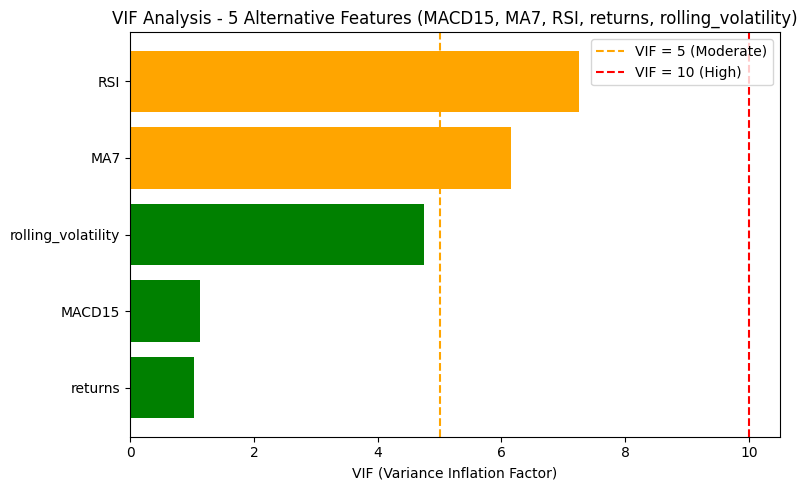


Correlation Matrix for 5 Alternative Features:
                      MACD15       MA7       RSI   returns  rolling_volatility
MACD15              1.000000  0.187037  0.591003  0.044416            0.078327
MA7                 0.187037  1.000000  0.079439 -0.004449            0.007319
RSI                 0.591003  0.079439  1.000000  0.234802           -0.012388
returns             0.044416 -0.004449  0.234802  1.000000            0.011279
rolling_volatility  0.078327  0.007319 -0.012388  0.011279            1.000000

Max absolute correlation: 0.5910
Min absolute correlation: 0.0044


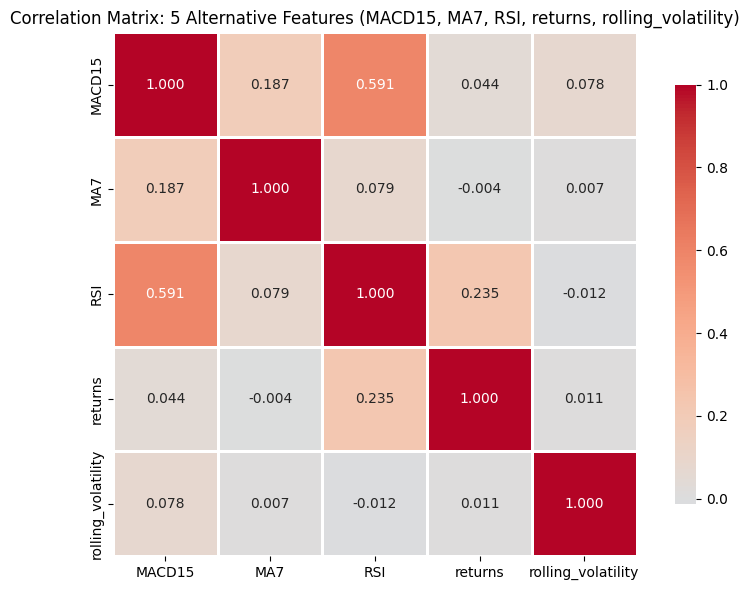


COMPARISON: Baseline 5 Features vs Alternative 4 Features

Baseline 5 features (MACD30, MACD15, RSI, returns, rolling_volatility):
  Average VIF: 7.54
  Max VIF: 13.97
  Features with VIF >= 10: 2

Alternative 5 features (MACD15, MA7, RSI, returns, rolling_volatility):
  Average VIF: 4.07
  Max VIF: 7.26
  Features with VIF >= 10: 0

Improvement:
  Average VIF reduction: 3.48
  Max VIF reduction: 6.72


In [81]:
# VIF (Variance Inflation Factor) Analysis - Alternative 5 Features (MACD15, MA7, RSI, returns, rolling_volatility)
# Test VIF for alternative feature combination: MACD15, MA7, RSI, returns, rolling_volatility
# This combination replaces MACD30 with MA7 to avoid high multicollinearity between MACD30 and MACD15

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the 5 alternative features (replace MACD30 with MA7)
alternative_features = ['MACD15', 'MA7', 'RSI', 'returns', 'rolling_volatility']

# Check if all features exist in X
missing_features = [f for f in alternative_features if f not in X.columns]
if missing_features:
    print(f"WARNING: Some alternative features are missing: {missing_features}")
    print(f"Available features: {list(X.columns)}")
    # Use original data if features were dropped
    X_alternative = train_df[alternative_features].dropna()
else:
    X_alternative = X[alternative_features].dropna()

print(f"Analyzing VIF for {len(alternative_features)} alternative features:")
print(f"  {alternative_features}")
print(f"\nData shape: {X_alternative.shape}")

# Calculate VIF for each feature
vif_alternative = pd.DataFrame()
vif_alternative["Feature"] = X_alternative.columns
vif_alternative["VIF"] = [variance_inflation_factor(X_alternative.values, i) 
                           for i in range(X_alternative.shape[1])]

# Sort by VIF value (descending)
vif_alternative = vif_alternative.sort_values('VIF', ascending=False)

print("="*60)
print("VIF ANALYSIS - 5 ALTERNATIVE FEATURES (MACD15, MA7, RSI, returns, rolling_volatility)")
print("="*60)
print(f"\nVIF values for 5 alternative features:\n")
print(vif_alternative.to_string(index=False))

# Check VIF thresholds
high_vif_threshold = 10
high_vif = vif_alternative[vif_alternative['VIF'] >= high_vif_threshold]
moderate_vif = vif_alternative[(vif_alternative['VIF'] >= 5) & (vif_alternative['VIF'] < high_vif_threshold)]
low_vif = vif_alternative[vif_alternative['VIF'] < 5]

print(f"\n{'='*60}")
print("VIF Summary:")
print(f"  High VIF (>= 10): {len(high_vif)} features")
if len(high_vif) > 0:
    print(f"    {high_vif['Feature'].tolist()}")
print(f"  Moderate VIF (5-10): {len(moderate_vif)} features")
if len(moderate_vif) > 0:
    print(f"    {moderate_vif['Feature'].tolist()}")
print(f"  Low VIF (< 5): {len(low_vif)} features")
if len(low_vif) > 0:
    print(f"    {low_vif['Feature'].tolist()}")
print(f"\n  Average VIF: {vif_alternative['VIF'].mean():.2f}")
print(f"  Max VIF: {vif_alternative['VIF'].max():.2f}")
print(f"  Min VIF: {vif_alternative['VIF'].min():.2f}")

# Visualize VIF values
plt.figure(figsize=(8, 5))
colors = ['red' if v >= 10 else 'orange' if v >= 5 else 'green' for v in vif_alternative['VIF']]
plt.barh(range(len(vif_alternative)), vif_alternative['VIF'].values, color=colors)
plt.yticks(range(len(vif_alternative)), vif_alternative['Feature'].values)
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('VIF Analysis - 5 Alternative Features (MACD15, MA7, RSI, returns, rolling_volatility)')
plt.axvline(x=5, color='orange', linestyle='--', label='VIF = 5 (Moderate)')
plt.axvline(x=10, color='red', linestyle='--', label='VIF = 10 (High)')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Show correlation matrix for these 5 features
print(f"\n{'='*60}")
print("Correlation Matrix for 5 Alternative Features:")
print("="*60)
corr_alternative = X_alternative.corr()
print(corr_alternative.to_string())
print(f"\nMax absolute correlation: {corr_alternative.values[np.triu_indices_from(corr_alternative.values, k=1)].max():.4f}")
print(f"Min absolute correlation: {np.abs(corr_alternative.values[np.triu_indices_from(corr_alternative.values, k=1)]).min():.4f}")

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_alternative, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: 5 Alternative Features (MACD15, MA7, RSI, returns, rolling_volatility)')
plt.tight_layout()
plt.show()

# Compare with baseline 5 features if available
if 'vif_baseline' in locals():
    print(f"\n{'='*60}")
    print("COMPARISON: Baseline 5 Features vs Alternative 4 Features")
    print("="*60)
    print(f"\nBaseline 5 features (MACD30, MACD15, RSI, returns, rolling_volatility):")
    print(f"  Average VIF: {vif_baseline['VIF'].mean():.2f}")
    print(f"  Max VIF: {vif_baseline['VIF'].max():.2f}")
    print(f"  Features with VIF >= 10: {len(vif_baseline[vif_baseline['VIF'] >= 10])}")
    print(f"\nAlternative 5 features (MACD15, MA7, RSI, returns, rolling_volatility):")
    print(f"  Average VIF: {vif_alternative['VIF'].mean():.2f}")
    print(f"  Max VIF: {vif_alternative['VIF'].max():.2f}")
    print(f"  Features with VIF >= 10: {len(vif_alternative[vif_alternative['VIF'] >= 10])}")
    print(f"\nImprovement:")
    print(f"  Average VIF reduction: {vif_baseline['VIF'].mean() - vif_alternative['VIF'].mean():.2f}")
    print(f"  Max VIF reduction: {vif_baseline['VIF'].max() - vif_alternative['VIF'].max():.2f}")


Analyzing VIF for 5 baseline features:
  ['MACD30', 'MACD15', 'RSI', 'returns', 'rolling_volatility']

Data shape: (6302, 5)
VIF ANALYSIS - 5 BASELINE FEATURES

VIF values for 5 baseline features:

           Feature       VIF
            MACD15 13.972138
            MACD30 13.261306
               RSI  4.850331
rolling_volatility  4.606413
           returns  1.020354

VIF Summary:
  High VIF (>= 10): 2 features
    ['MACD15', 'MACD30']
  Moderate VIF (5-10): 0 features
  Low VIF (< 5): 3 features
    ['RSI', 'rolling_volatility', 'returns']

  Average VIF: 7.54
  Max VIF: 13.97
  Min VIF: 1.02


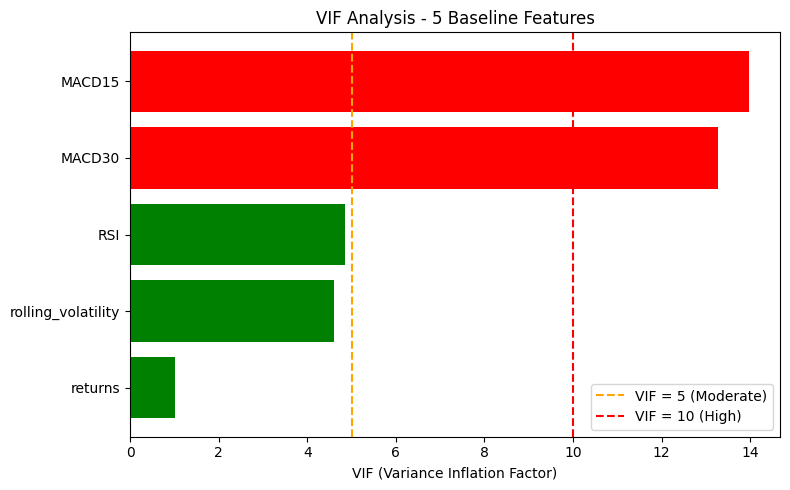


Correlation Matrix for 5 Baseline Features:
                      MACD30    MACD15       RSI   returns  rolling_volatility
MACD30              1.000000 -0.957509 -0.447056 -0.024049           -0.082394
MACD15             -0.957509  1.000000  0.591003  0.044416            0.078327
RSI                -0.447056  0.591003  1.000000  0.234802           -0.012388
returns            -0.024049  0.044416  0.234802  1.000000            0.011279
rolling_volatility -0.082394  0.078327 -0.012388  0.011279            1.000000

Max absolute correlation: 0.5910
Min absolute correlation: 0.0113


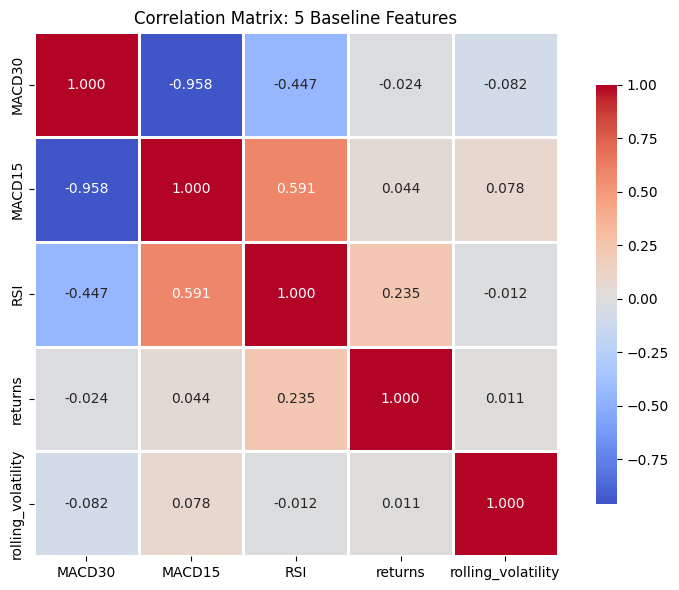

In [82]:
# VIF (Variance Inflation Factor) Analysis - 5 Baseline Features
# Calculate VIF for the 5 features used in baseline model: MACD30, MACD15, RSI, returns, rolling_volatility
# VIF measures how much the variance of a regression coefficient increases due to collinearity
# VIF = 1: No collinearity
# 1 < VIF < 5: Moderate collinearity (acceptable)
# 5 <= VIF < 10: High collinearity (concerning)
# VIF >= 10: Very high collinearity (problematic)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the 5 baseline features
baseline_features = ['MACD30', 'MACD15', 'RSI', 'returns', 'rolling_volatility']

# Check if all features exist in X
missing_features = [f for f in baseline_features if f not in X.columns]
if missing_features:
    print(f"WARNING: Some baseline features are missing: {missing_features}")
    print(f"Available features: {list(X.columns)}")
    # Use original data if features were dropped
    X_baseline = train_df[baseline_features].dropna()
else:
    X_baseline = X[baseline_features].dropna()

print(f"Analyzing VIF for {len(baseline_features)} baseline features:")
print(f"  {baseline_features}")
print(f"\nData shape: {X_baseline.shape}")

# Calculate VIF for each feature
vif_baseline = pd.DataFrame()
vif_baseline["Feature"] = X_baseline.columns
vif_baseline["VIF"] = [variance_inflation_factor(X_baseline.values, i) 
                       for i in range(X_baseline.shape[1])]

# Sort by VIF value (descending)
vif_baseline = vif_baseline.sort_values('VIF', ascending=False)

print("="*60)
print("VIF ANALYSIS - 5 BASELINE FEATURES")
print("="*60)
print(f"\nVIF values for 5 baseline features:\n")
print(vif_baseline.to_string(index=False))

# Check VIF thresholds
high_vif_threshold = 10
high_vif = vif_baseline[vif_baseline['VIF'] >= high_vif_threshold]
moderate_vif = vif_baseline[(vif_baseline['VIF'] >= 5) & (vif_baseline['VIF'] < high_vif_threshold)]
low_vif = vif_baseline[vif_baseline['VIF'] < 5]

print(f"\n{'='*60}")
print("VIF Summary:")
print(f"  High VIF (>= 10): {len(high_vif)} features")
if len(high_vif) > 0:
    print(f"    {high_vif['Feature'].tolist()}")
print(f"  Moderate VIF (5-10): {len(moderate_vif)} features")
if len(moderate_vif) > 0:
    print(f"    {moderate_vif['Feature'].tolist()}")
print(f"  Low VIF (< 5): {len(low_vif)} features")
if len(low_vif) > 0:
    print(f"    {low_vif['Feature'].tolist()}")
print(f"\n  Average VIF: {vif_baseline['VIF'].mean():.2f}")
print(f"  Max VIF: {vif_baseline['VIF'].max():.2f}")
print(f"  Min VIF: {vif_baseline['VIF'].min():.2f}")

# Visualize VIF values
plt.figure(figsize=(8, 5))
colors = ['red' if v >= 10 else 'orange' if v >= 5 else 'green' for v in vif_baseline['VIF']]
plt.barh(range(len(vif_baseline)), vif_baseline['VIF'].values, color=colors)
plt.yticks(range(len(vif_baseline)), vif_baseline['Feature'].values)
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('VIF Analysis - 5 Baseline Features')
plt.axvline(x=5, color='orange', linestyle='--', label='VIF = 5 (Moderate)')
plt.axvline(x=10, color='red', linestyle='--', label='VIF = 10 (High)')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Show correlation matrix for these 5 features
print(f"\n{'='*60}")
print("Correlation Matrix for 5 Baseline Features:")
print("="*60)
corr_baseline = X_baseline.corr()
print(corr_baseline.to_string())
print(f"\nMax absolute correlation: {corr_baseline.values[np.triu_indices_from(corr_baseline.values, k=1)].max():.4f}")
print(f"Min absolute correlation: {np.abs(corr_baseline.values[np.triu_indices_from(corr_baseline.values, k=1)]).min():.4f}")

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_baseline, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: 5 Baseline Features')
plt.tight_layout()
plt.show()


After dropping rows with NaN: 6302 rows (dropped 2 rows)
Explained Variance Ratio for first 9 components:
PC1: 0.4512 (45.12%)
PC2: 0.2561 (25.61%)
PC3: 0.1183 (11.83%)
PC4: 0.1113 (11.13%)
PC5: 0.0586 (5.86%)
PC6: 0.0031 (0.31%)
PC7: 0.0013 (0.13%)
PC8: 0.0001 (0.01%)
PC9: 0.0000 (0.00%)

Cumulative variance for first 9 components: 1.0000 (100.00%)

Top 9 Features based on PCA (after dropping high correlation features):
           Feature  Importance
            MACD30    2.290360
            MACD15    2.201649
          BB_lower    2.042651
          BB_upper    2.015253
               MA7    2.011342
              MA30    2.000280
               RSI    1.853126
           returns    1.769970
rolling_volatility    1.644604


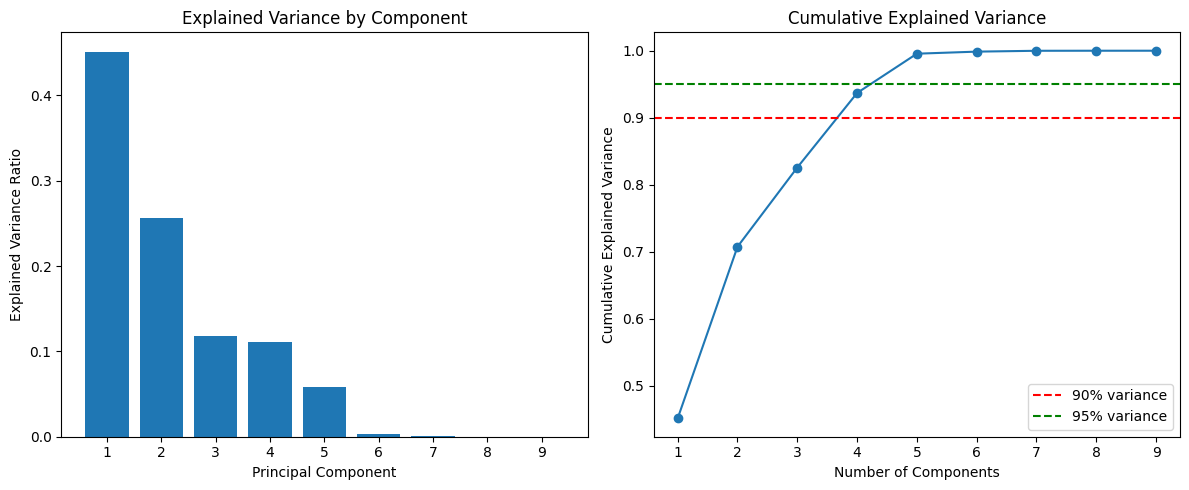

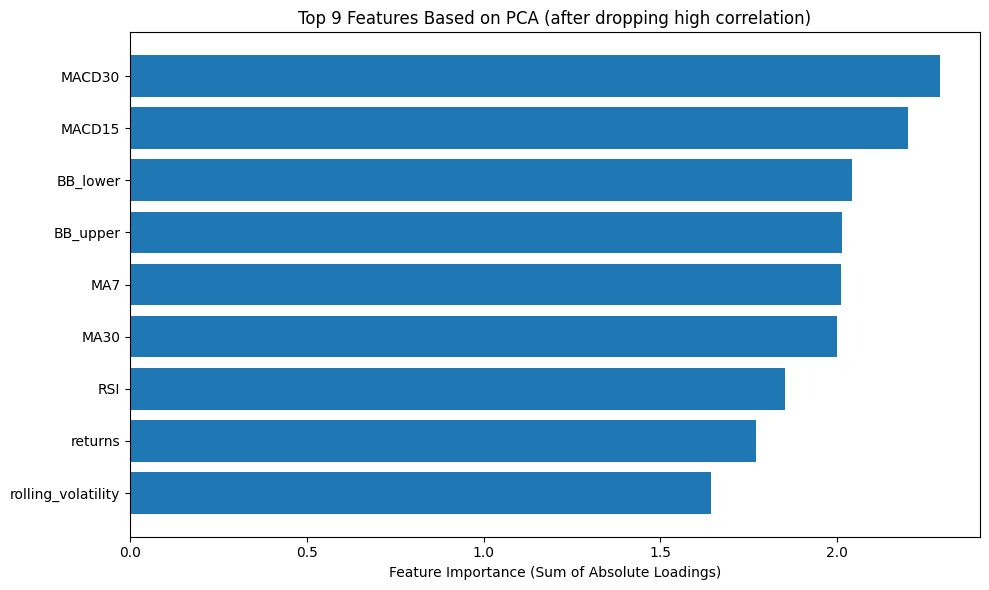


Top 9 Feature Names (after dropping high correlation):
['MACD30', 'MACD15', 'BB_lower', 'BB_upper', 'MA7', 'MA30', 'RSI', 'returns', 'rolling_volatility']


In [83]:
# PCA Analysis after dropping high correlation features
# (Run this cell after dropping features in Cell 9)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Handle missing values: drop rows with any NaN
X_clean = X.dropna()
print(f"After dropping rows with NaN: {X_clean.shape[0]} rows (dropped {X.shape[0] - X_clean.shape[0]} rows)")

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance for first 10 components (or all if fewer than 10)
n_components = min(10, len(explained_variance))
print(f"Explained Variance Ratio for first {n_components} components:")
for i in range(n_components):
    print(f"PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")

# Get cumulative variance for available components
last_idx = min(9, len(cumulative_variance) - 1)
print(f"\nCumulative variance for first {n_components} components: {cumulative_variance[last_idx]:.4f} ({cumulative_variance[last_idx]*100:.2f}%)")

# Get component loadings (correlations between features and principal components)
component_loadings = pca.components_.T  # Transpose to get features x components

# Calculate feature importance based on absolute loadings across top components
# We'll use all available components (since we have fewer than 10 features now)
n_components_to_use = len(pca.components_)
feature_importance = np.abs(component_loadings[:, :n_components_to_use]).sum(axis=1)

# Create DataFrame with feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

n_top = min(10, len(feature_importance_df))
print(f"\nTop {n_top} Features based on PCA (after dropping high correlation features):")
print(feature_importance_df.head(n_top).to_string(index=False))

# Visualize explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Explained variance per component
n_plot = min(10, len(explained_variance))
plt.subplot(1, 2, 1)
plt.bar(range(1, n_plot + 1), explained_variance[:n_plot])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.xticks(range(1, n_plot + 1))

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, n_plot + 1), cumulative_variance[:n_plot], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
plt.legend()
plt.xticks(range(1, n_plot + 1))

plt.tight_layout()
plt.show()

# Visualize top features
n_top_features = min(10, len(feature_importance_df))
plt.figure(figsize=(10, 6))
top_features = feature_importance_df.head(n_top_features)
plt.barh(range(len(top_features)), top_features['Importance'].values)
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('Feature Importance (Sum of Absolute Loadings)')
plt.title(f'Top {n_top_features} Features Based on PCA (after dropping high correlation)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Store top feature names
top_feature_names = top_features['Feature'].tolist()
print(f"\nTop {n_top_features} Feature Names (after dropping high correlation):")
print(top_feature_names)
